In [22]:
#Dataset loading
import pandas as pd
df = pd.read_csv("C:/Users/singh/Downloads/Fraud.csv")
print("Shape:", df.shape)
df.head()


Shape: (1048575, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
 #CLEAN DATA CLEANING  
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:/Users/singh/Downloads/Fraud.csv")

# 1.Remove duplicate rows 
df = df.drop_duplicates()

# 2.Missing values
print(" Missing values in each column:")
print(df.isnull().sum())

# 3.Outliers 
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['amount'] < lower) | (df['amount'] > upper)]
print("\n  Number of outliers in 'amount':", outliers.shape[0])
# 4. Drop columns manually
cols_to_drop = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df = df.drop(columns=cols_to_drop)
print("\n Dropped highly correlated columns:", cols_to_drop)




 Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

  Number of outliers in 'amount': 53088

 Dropped highly correlated columns: ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [15]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   isFraud         1048575 non-null  int64  
 3   hour            1048575 non-null  int64  
 4   isNight         1048575 non-null  int64  
 5   isMerchantDest  1048575 non-null  int64  
 6   type_CASH_OUT   1048575 non-null  bool   
 7   type_DEBIT      1048575 non-null  bool   
 8   type_PAYMENT    1048575 non-null  bool   
 9   type_TRANSFER   1048575 non-null  bool   
dtypes: bool(4), float64(1), int64(5)
memory usage: 52.0 MB


In [16]:
# 6. Drop a column
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/singh/Downloads/Fraud.csv")
if 'isFlaggedFraud' in df.columns and df['isFlaggedFraud'].nunique() == 1:
    df = df.drop(columns=['isFlaggedFraud'])
    print("\n  Dropped 'isFlaggedFraud' because it has only one unique value")



  Dropped 'isFlaggedFraud' because it has only one unique value


In [17]:
# 7. Drop columns (high correlation) manually
cols_to_drop = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df = df.drop(columns=cols_to_drop)
print("\n Dropped highly correlated columns:", cols_to_drop)


 Dropped highly correlated columns: ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [18]:
# 8. 🛠️ Feature Engineering 
df['hour'] = df['step'] % 24
df['isNight'] = df['hour'].apply(lambda x: 1 if x <= 6 else 0)
df['isMerchantDest'] = df['nameDest'].apply(lambda x: 1 if str(x).startswith('M') else 0)
df = df.drop(columns=['nameOrig', 'nameDest'])
df = pd.get_dummies(df, columns=['type'], drop_first=True)
print("\n Final columns after feature engineering:")
print(df.columns)



 Final columns after feature engineering:
Index(['step', 'amount', 'isFraud', 'hour', 'isNight', 'isMerchantDest',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['isFraud'])  
y = df['isFraud']                 
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes - Train:", X_train.shape, ", Test:", X_test.shape)


Shapes - Train: (838860, 9) , Test: (209715, 9)


In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['isFraud'])
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#9.SMOTE to balance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(" SMOTE Done. Resampled shapes:")
print("X_train:", X_resampled.shape)
print("y_train:", y_resampled.shape)


 SMOTE Done. Resampled shapes:
X_train: (1675884, 9)
y_train: (1675884,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#  Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

#  Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # for ROC-AUC

#  Evaluate the model
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n ROC-AUC Score:", roc_auc_score(y_test, y_proba))



 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.17      0.60      0.27       224

    accuracy                           1.00    209715
   macro avg       0.59      0.80      0.63    209715
weighted avg       1.00      1.00      1.00    209715


 Confusion Matrix:
[[208837    654]
 [    89    135]]

 ROC-AUC Score: 0.8684728699562273


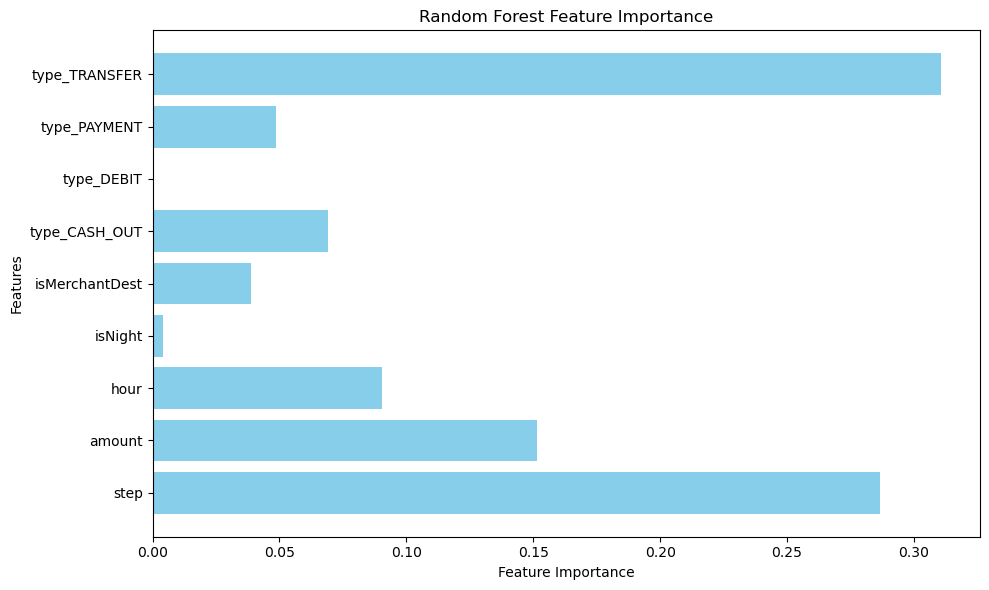

In [21]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
features = X_train.columns
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


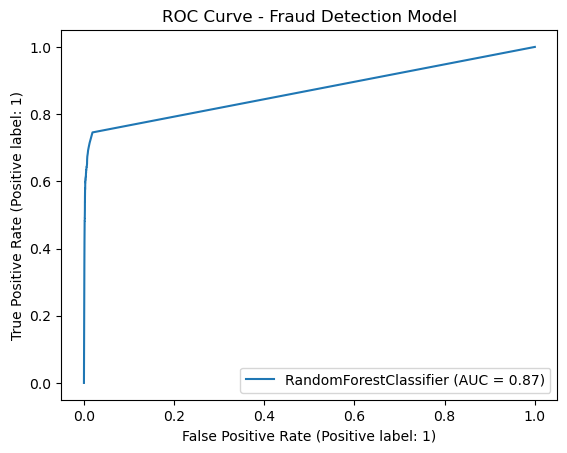

In [12]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Fraud Detection Model")
plt.show()


### 1. Data Cleaning Including Missing Values, Outliers and Multi-Collinearity  
---Missing values: Checked by df.null().sum()  
---Duplicates: by df.drop_duplicates()  
---Outlier: Detected by IQR method.  
---Multicollinearity: Dropped columns with correlation after VIF(Variance Inflation Factor).  

---

### 2. Describe Your Fraud Detection Model in Elaboration  
---I used a Random Forest classifier, it is a powerful learning method.  
---It handle large datasets.  
---I trained the model after balancing classes using SMOTE (a method used in machine learning to address the problem of imbalanced datasets).  

---

### 3. How Did You Select Variables to Be Included in the Model?  
---Numeric Columns like step, amount  
---Engineered features: hour, isNight, isMerchantDest  
---Some Correlated columns to reduce multicollinearity.  

---

### 4. Demonstrate the Performance of the Model by Using Best Set of Tools  
---Results from Random Forest  
---Classification Report  
---Confusion Matrix  
---ROC_AUC Score (The curves is also visualized).  

---

### 5. What Are the Key Factors That Predict Fraudulent Customers?  
---Transaction Type (Transfer, cash out)  
---Transaction Done at night (isNight = 1)  
---High transaction Amount.  

---

### 6. Do These Factors Make Sense? If Yes, How?  
---Yes:  
---Fraudsters target large amount.  
---They usually Transfer stolen money quickly.  
---Fraud activities often occur during late night hours when monitoring is lower.  

---

### 7. What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?  
---Late night non-merchant transfer  
---Limit high value transfers without verification.  
---Deploy real time monitoring.  

---

### 8. Assuming These Actions Have Been Implemented, How Would You Determine if They Work?  
---Monitor fraud rate trends  
---Track false positive/negative rate  
---Evaluate model precision and recall over time  
